In [1]:
from src.utils.image_loader import ImageLoader
from src.utils.visualisation import DatasetVisualizer


In [2]:
dataset = ImageLoader(root_path=r"C:\Users\PC\Desktop\données\deepfake_database",extensions={".jpg", ".jpeg", ".png"},recursive=True)

In [3]:
dataset.get_dataset_stats()

{'total_images': 19457,
 'extensions': {'.jpeg': 1, '.png': 0, '.jpg': 19456},
 'class_distribution': {'real': 11509, 'df': 7948},
 'class_statistics': {'real': {'count': 11509,
   'extensions': {'.jpeg': 1, '.jpg': 11508}},
  'df': {'count': 7948, 'extensions': {'.jpg': 7948}}}}

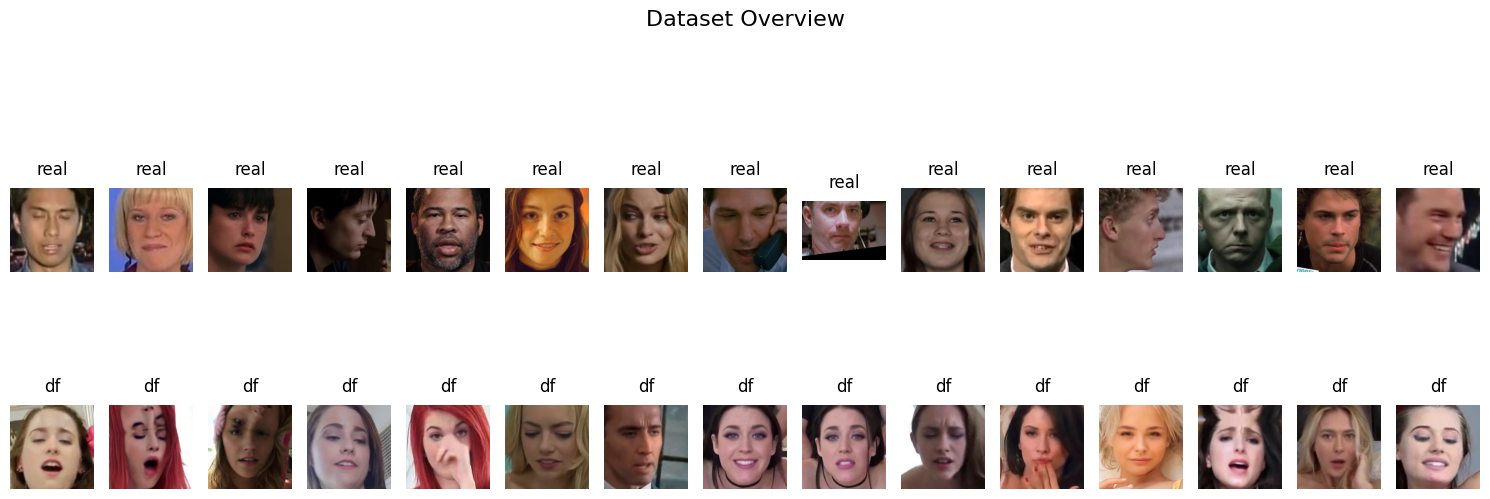

In [4]:
DatasetVisualizer.viz(dataset, images_per_class=15)

In [5]:
splits = dataset.split(train=0.8, val=0.15, test=0.05)


In [6]:
train_dataset = splits['train']
val_dataset = splits['val']
test_dataset = splits['test']

In [7]:
train_dataset.get_dataset_stats()

{'total_images': 18660,
 'extensions': {'.jpeg': 1, '.png': 0, '.jpg': 18659},
 'class_distribution': {'real': 11049, 'df': 7611},
 'class_statistics': {'real': {'count': 11049,
   'extensions': {'.jpeg': 1, '.jpg': 11048}},
  'df': {'count': 7611, 'extensions': {'.jpg': 7611}}}}

In [14]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers, models

"""
Interoperability tests with TensorFlow


"""

train_ds, num_classes = train_dataset.to_tensorflow()
val_dataset.to_tensorflow()
test_dataset.to_tensorflow()

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 2)

In [11]:
def build_model(num_classes):
    model = models.Sequential([
        layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model